In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
import numpy as np

%matplotlib inline

simulator = Aer.get_backend('qasm_simulator')

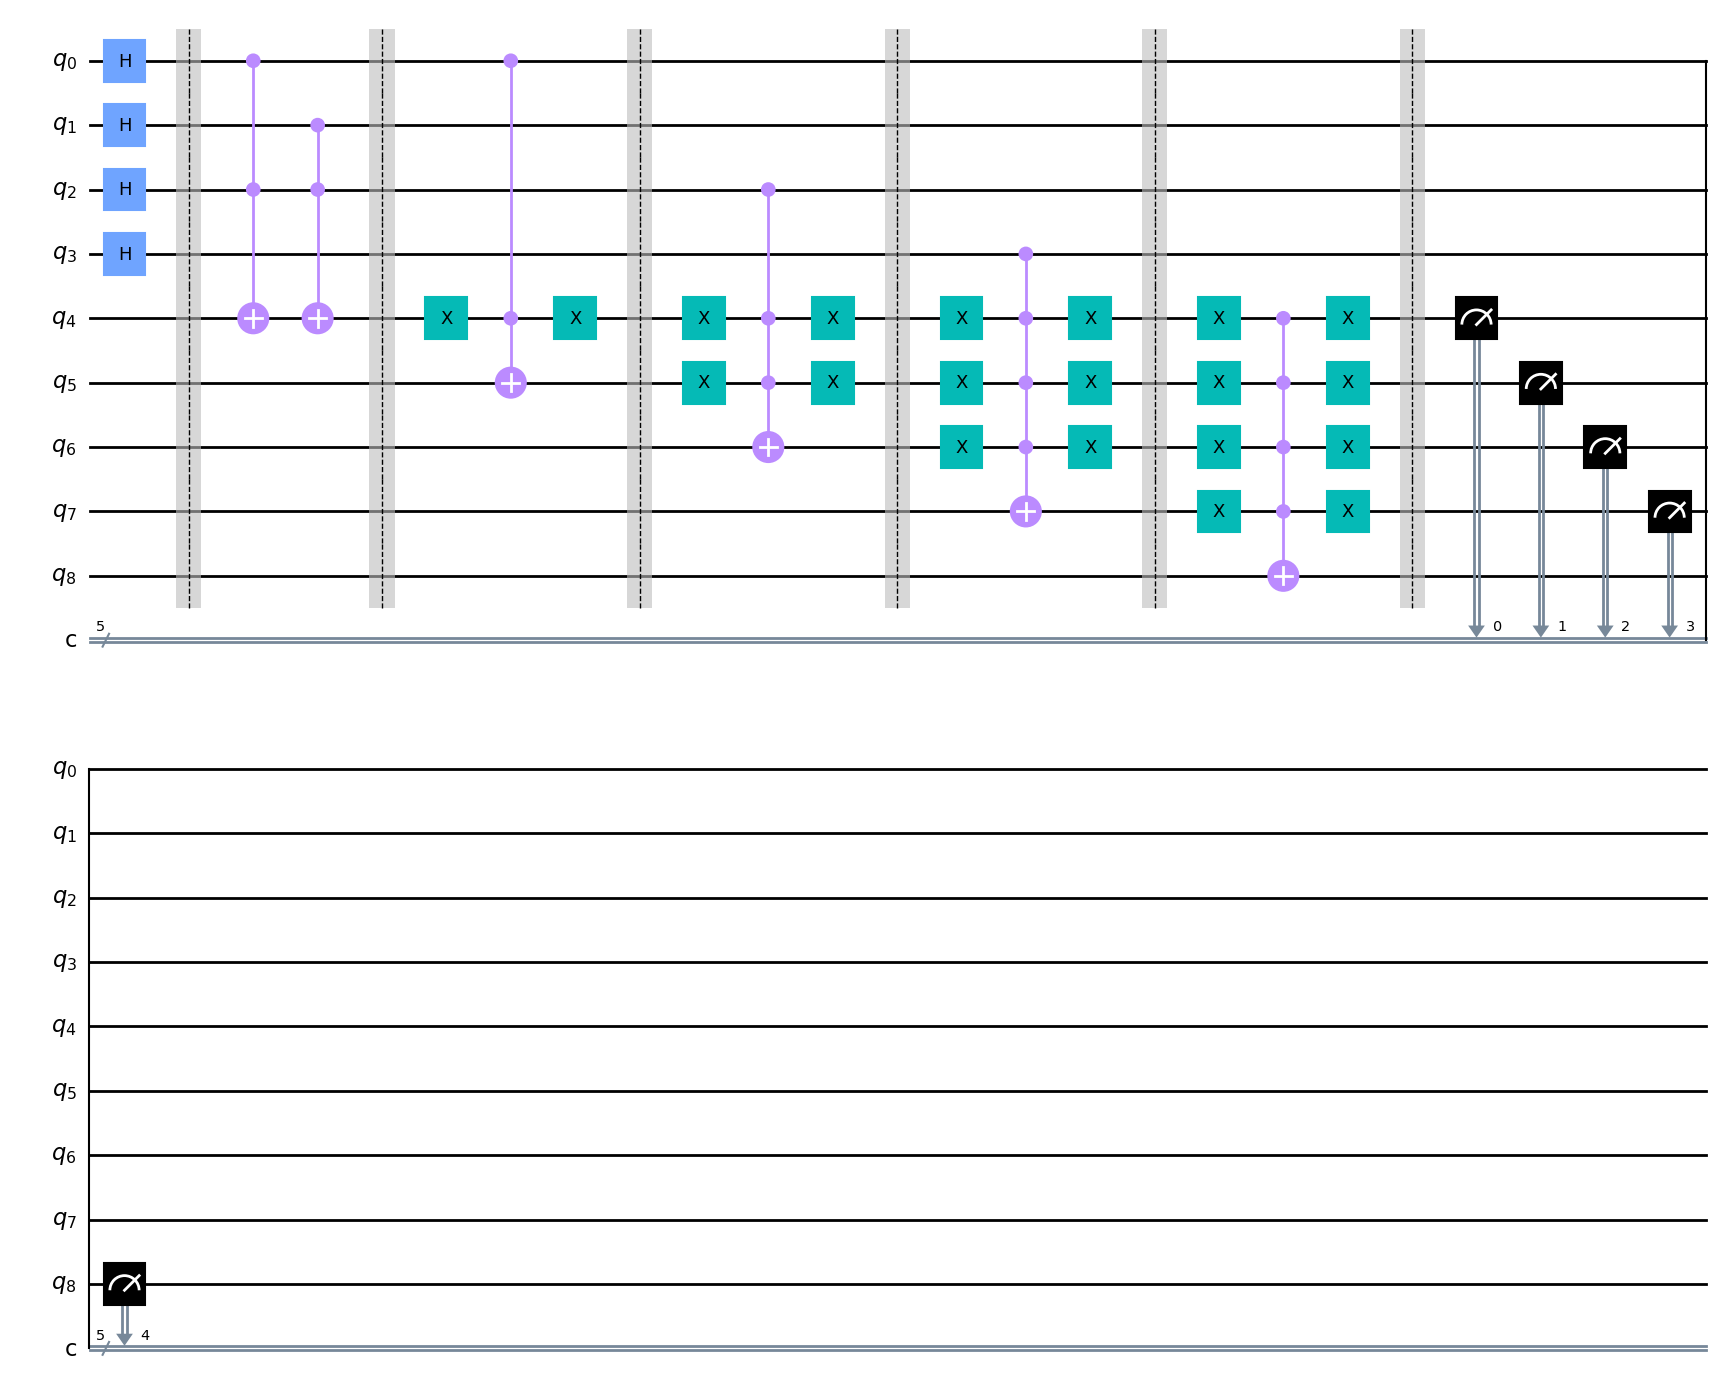

In [2]:
circuit = QuantumCircuit(9,5)
#circuit.initialize(Statevector.from_label('00000000000'))
circuit.h([0,1,2,3])
circuit.barrier() ## RULE 1
circuit.mct([0,2], 4)
circuit.mct([1,2], 4)
circuit.barrier() ## RULE 2
circuit.x([4])
circuit.mct([0,4],5)
circuit.x([4])
circuit.barrier() ## RULE 3
circuit.x([4,5])
circuit.mct([2,4,5],6)
circuit.x([4,5])
circuit.barrier() ## RULE 4
circuit.x([4,5,6])
circuit.mct([3,4,5,6],7)
circuit.x([4,5,6])
circuit.barrier() ## RULE 5
circuit.x([4,5,6,7])
circuit.mct([4,5,6,7],8)
circuit.x([4,5,6,7])
circuit.barrier()
circuit.measure([4,5,6,7,8],[0,1,2,3,4])
circuit.draw('mpl')

In [3]:
job = execute(circuit, backend=simulator, shots=1000000)
result = job.result()

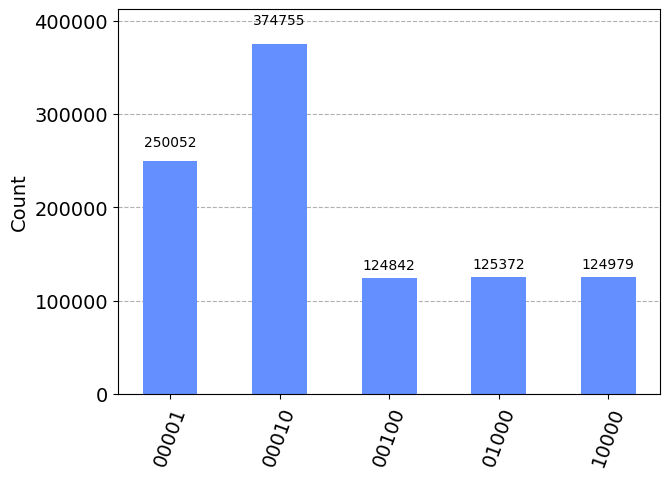

In [4]:
plot_histogram(result.get_counts())